(sec:pandas)=

# Pandas の基本


Pandas (panel-data-s の略)は、Python 向けのデータ分析ライブラリで、主にスプレッドシート状のデータを扱うことができる。Pandas では以下に説明する`DataFrame`を使って、データの操作やファイル入出力、グラフの作成等を行うことができる。


In [1]:
"""
下準備のコード
"""

import seaborn as sns
import matplotlib

# グラフの設定
rc = {"figure.dpi": 150}
sns.set_theme(style="white", palette="colorblind", rc=rc)
color_palette = sns.color_palette("colorblind")

## DataFrame の操作


Pandas の中核をなすデータ構造に`DataFrame`がある。DataFrame とは、スプレッドシート状のデータを扱うデータ構造で、Excel のように数値を縦横に配置したデータを作ることができる。

```{image} https://pandas.pydata.org/docs/_images/01_table_dataframe.svg
:align: center
:width: 80%
```

<div align="center">
    
(Pandasの[チュートリアル](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html)より引用)

</div>


例えば、テストの点数を集計したようなデータを考えてみる。以下、三人の学生について、数学と英語の点数を集計した物である (性別と点数の間には特別な意味はない)。


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(
    {
        "Name": ["Taro", "Jiro", "Hanako"],
        "Math": [100, 90, 85],
        "English": [85, 90, 100],
    }
)
print(df)

     Name  Math  English
0    Taro   100       85
1    Jiro    90       90
2  Hanako    85      100


上記の通り、`print`で`DataFrame`を出力すると、表のように整理された文字列が出力される。また、Jupyter 環境であれば、単に`df`と書くか、IPython モジュールの`display`を用いることで HTML により整形された表を出力することができる。


In [3]:
# 単にdfと書く
df

,Name,Math,English
0,Taro,100,85
1,Jiro,90,90
2,Hanako,85,100


In [4]:
# displayの使用
from IPython.display import display

display(df)

,Name,Math,English
0,Taro,100,85
1,Jiro,90,90
2,Hanako,85,100


なお、`DataFrame`においては、各行にデフォルトで数字のインデックスが振られるが、これ自体は必要なく、例えば Name の列で各行を代表させれ十分であることも多い。このような場合には、DataFrame に対して`index`を指定して初期化する。


In [5]:
df_label = pd.DataFrame(
    {
        "Math": [100, 90, 85],
        "English": [85, 90, 100],
    },
    index=["Taro", "Jiro", "Hanako"],
)

In [6]:
df_label

,Math,English
Taro,100,85
Jiro,90,90
Hanako,85,100


```{note}
`index`を指定しない場合は、`index`に当たる0, 1, 2, ...がラベルであると見なされる。特に行お操作を行うときに、ラベルがインデックスなのか、その他の文字列等なのかを意識しておくことが大事になる。
```


### 行と列の取り出し


Pandas では行と列の意味合いが微妙に異なっており、それぞれを取り扱う場合に異なる操作が必要となる。

**列の取り出し**

`DataFrame`の各列は`Series`という型で表わされていて、df に各列のラベルを与えることで取り出すことができる。


In [7]:
col = df["Math"]
print('type is "{:s}"'.format(type(col).__name__))

type is "Series"


In [8]:
col

0    100
1     90
2     85
Name: Math, dtype: int64

また、複数のラベルを指定して、以下のように複数列を一度に取り出すこともできる。


In [9]:
cols = df[["Math", "English"]]
cols

,Math,English
0,100,85
1,90,90
2,85,100


**行の取り出し**

一方で、行を取り出す場合には`loc`あるいは`iloc`を用いる。`loc`は各行にラベルがついている場合に使用し、`iloc`は単純に行のインデックスを指定して使用する。


In [10]:
df.iloc[0]

Name       Taro
Math        100
English      85
Name: 0, dtype: object

In [11]:
df_label.loc["Taro"]

Math       100
English     85
Name: Taro, dtype: int64

### 行と列の追加


**列の追加**

列を追加する方法はいくつかあるが、行と列でできるだけ似た操作を使うのなら`DataFrame`を辞書型のように扱って、データ列を代入する方法と`concat`を使う方法の 2 つがある。この 2 つなら辞書型として扱う方法の方が簡単で、行ラベルがインデックスなのか文字列等七日によって区別する必要がない。


In [12]:
# 辞書型として使う場合 (df自体が書き換わるので注意)
df_copy = df.copy()
df_copy["Physics"] = [75, 85, 80]
df_copy

,Name,Math,English,Physics
0,Taro,100,85,75
1,Jiro,90,90,85
2,Hanako,85,100,80


In [13]:
# concatを用いる方法 (行ラベルがインデックス)
new_col = pd.Series({0: 75, 1: 85, 2: 80}, name="Physics")
pd.concat([df, new_col], axis=1)

,Name,Math,English,Physics
0,Taro,100,85,75
1,Jiro,90,90,85
2,Hanako,85,100,80


`concat`を用いる場合、パラメータに`axis=1`を指定する (初期値は`axis=0` (行)に対応するので、明示的に`axis=1` (列)を指定する)。


In [14]:
# concatを用いる方法 (行ラベルが文字列)
new_col = pd.Series({"Taro": 75, "Jiro": 85, "Hanako": 80}, name="Physics")
pd.concat([df_label, new_col], axis=1)

,Math,English,Physics
Taro,100,85,75
Jiro,90,90,85
Hanako,85,100,80


**行の追加**

行を追加する場合も、上記の列の追加と同様に`df.loc`を辞書型と考えてデータ列を代入する方法 (こちらの方がシンプル)と、`concat`を用いてデータ行を結合する方法の 2 つがある。

行の場合は、行ラベルがインデックスなのか、文字列等なのかによって、書き方が異なる。特に、行を取り出す場合と異なり、`iloc`を用いるて行を追加することはできないので注意すること。


In [15]:
# locを用いる場合 (ラベルがインデックス)
df_copy = df.copy()
df_copy.loc[3] = ["Kikue", 100, 100]
df_copy

,Name,Math,English
0,Taro,100,85
1,Jiro,90,90
2,Hanako,85,100
3,Kikue,100,100


In [16]:
# locを用いる (ラベルが文字列他)
df_copy = df_label.copy()
df_copy.loc["Kikue"] = [100, 100]
df_copy

,Math,English
Taro,100,85
Jiro,90,90
Hanako,85,100
Kikue,100,100


`concat`を使って「行」を追加する場合には、一度、行を含む`DataFrame`を作成して、それを`concat`で結合する必要がある。一行分のデータであれば、


In [17]:
# concatを用いる (ラベルがインデックス)
new_row = pd.Series({"Name": "Kikue", "Math": 100, "English": 100}, name=3)
pd.concat([df, pd.DataFrame(new_row).T], axis=0)

,Name,Math,English
0,Taro,100,85
1,Jiro,90,90
2,Hanako,85,100
3,Kikue,100,100


In [18]:
# concatを用いる (ラベルが文字列)
new_row = pd.Series({"Math": 100, "English": 100}, name="Kikue")
pd.concat([df_label, pd.DataFrame(new_row).T], axis=0)

,Math,English
Taro,100,85
Jiro,90,90
Hanako,85,100
Kikue,100,100


### 行と列の削除


行や列の削除には共通で`drop`を用いる。この関数の引数には`index=...`(行ラベルを指定)と`columns=...`(列ラベルを指定)という引数があり、これらを用いて削除すべき行や列を指定する。なお、`drop`は`DataFrame`自体を**更新しない**ので、もし`DataFrame`自体を更新したい場合には引数に`inplace=True`を与える。


In [19]:
df_copy = df_label.copy()
df_copy.drop(index=["Jiro"])

,Math,English
Taro,100,85
Hanako,85,100


In [20]:
df_copy = df_label.copy()
df_copy.drop(columns=["Math"])

,English
Taro,85
Jiro,90
Hanako,100


また、`labels=...`と`axis=...`を指定することで、行(`axis=0`)と列(`axis=1`)の何番目かを指定して削除することもできる。


In [21]:
df_copy = df_label.copy()
df_copy.drop(labels=["Taro"], axis=0)  # 行を削除

,Math,English
Jiro,90,90
Hanako,85,100


In [22]:
df_copy = df_label.copy()
df_copy.drop(labels=["Math"], axis=1)  # 列を削除

,English
Taro,85
Jiro,90
Hanako,100


### 要素へのアクセス


要素へのアクセスには、これまでにも登場した`loc`や`iloc`を用いる。これらに行、列のラベルやインデックスを指定することで要素へのアクセスができる。


In [23]:
# ラベルを用いてアクセスする場合
print(df_label.loc["Taro", "English"])

85


In [24]:
# インデックスを用いてアクセスする場合 (0行: Taro, 1列: English)
print(df_label.iloc[0, 1])

85


また、要素のアクセス時は、通常の配列と同様に範囲を`:`を用いて指定することもできる。


In [25]:
# ラベルを用いて範囲指定
print(df_label.loc["Taro":"Hanako", "Math"])

Taro      100
Jiro       90
Hanako     85
Name: Math, dtype: int64


In [26]:
# インデックスを用いて範囲指定
print(df_label.iloc[0:3, 0])

Taro      100
Jiro       90
Hanako     85
Name: Math, dtype: int64


また、NumPy などと同様に、取り出したいインデックスやラベルを配列としても指定できる。


In [27]:
# ラベルを用いて指定
print(df_label.loc[["Taro", "Jiro"], "Math"])

Taro    100
Jiro     90
Name: Math, dtype: int64


In [28]:
# インデックスを用いて指定
print(df_label.iloc[0:2, 0])

Taro    100
Jiro     90
Name: Math, dtype: int64


当然ながら、これらのアクセス方法を用いれば、`DataFrame`の値を書き換えることもできる。


In [29]:
df_copy = df_label.copy()
df_copy.loc["Taro", :] = 100  # Taroの全科目を100点に修正
df_copy

,Math,English
Taro,100,100
Jiro,90,90
Hanako,85,100


## 数値計算


Pandas では、`DataFrame`の各行や各列、データ全体に対して統計量を簡単に取ることができる。統計量には平均(`mean`)や標準偏差(`std`)などが用意されており、以下のように計算できる。


In [30]:
# Taroの平均点を計算
print("Taro's avg: {:.3f}".format(df_label.loc["Taro"].mean()))
# Englishの平均点を計算
print("English avg: {:.3f}".format(df_label["English"].mean()))

Taro's avg: 92.500
English avg: 91.667


これらを使うと、偏差値なども簡単に計算できる。


In [31]:
# 数学の偏差値を計算
math_dev = 50.0 + (df["Math"] - df["Math"].mean()) / df["Math"].std() * 10.0
math_dev.name = "Math dev."
print(math_dev)

0    60.910895
1    47.817821
2    41.271284
Name: Math dev., dtype: float64


In [32]:
# 英語の偏差値を計算
eng_dev = 50.0 + (df["English"] - df["English"].mean()) / df["English"].std() * 10.0
eng_dev.name = "Eng. dev."
print(eng_dev)

0    41.271284
1    47.817821
2    60.910895
Name: Eng. dev., dtype: float64


このようにして計算した結果を表に挿入することで、より多くの情報を含んだ`DataFrame`を作り上げていくことができる。


In [33]:
df_copy = df_label.copy()
df_copy.loc[:, math_dev.name] = math_dev.values
df_copy.loc[:, eng_dev.name] = eng_dev.values
df_copy

,Math,English,Math dev.,Eng. dev.
Taro,100,85,60.910895,41.271284
Jiro,90,90,47.817821,47.817821
Hanako,85,100,41.271284,60.910895


行や列の順序を入れ替えたい場合には`loc`や`iloc`に入れ替え後のラベルやインデックスの配列を指定すれば良い。


In [34]:
df_copy = df_copy.loc[:, ["Math", "Math dev.", "English", "Eng. dev."]]
df_copy

,Math,Math dev.,English,Eng. dev.
Taro,100,60.910895,85,41.271284
Jiro,90,47.817821,90,47.817821
Hanako,85,41.271284,100,60.910895


最後に Math と English のそれぞれについて平均点を追加してみる。


In [35]:
math_avg = df["Math"].mean()
eng_avg = df["Math"].mean()
df_copy.loc["Avg"] = [math_avg, "N/A", eng_avg, "N/A"]
df_copy

,Math,Math dev.,English,Eng. dev.
Taro,100.000000,60.910895,85.000000,41.271284
Jiro,90.000000,47.817821,90.000000,47.817821
Hanako,85.000000,41.271284,100.000000,60.910895
Avg,91.666667,N/A,91.666667,N/A


## データの入出力


次に、先ほど作成した`DataFrame`をファイルに出力してみよう。出力できるファイル形式は様々だが、CSV と Excel 形式のファイルをここでは試してみる。

**ファイルへの出力**

CSV を出力する場合には`DataFrame`の`to_csv`を用いれば良く、第 1 引数に出力先のファイル名を指定する。加えて**日本語を出力する場合には`encoding="utf_8_sig"`あるいは`encoding="shift_jis"`を指定**しておく。


In [36]:
# 最初の列の表記を変更
df_copy = df_label.rename(index={"Taro": "太郎", "Jiro": "次郎", "Hanako": "花子"})
df_copy

,Math,English
太郎,100,85
次郎,90,90
花子,85,100


In [37]:
# CSVに出力
df_copy.to_csv("pandas.csv", encoding="utf_8_sig")

Excel ファイルを出力する場合は、`to_excel`に対して、出力ファイル名を含むいくつかの引数を指定する。Excel の場合は、エンコーディングを指定する必要はない (指定できない)。なお、Excel ファイルの操作を行う場合には、Pandas 以外に`openpyxl`をインストールしておく必要がある。


In [38]:
# Excelファイルに出力
df_copy.to_excel("pandas.xlsx")

正しく出力されると、Excel 上で以下のように表の内容が確認できる。

```{image} ./imgs/pandas_to_excel.jpg
:align: center
:width: 90%
```


**ファイルの読み取り**

ファイルからの読み取りには`read_csv`や`read_exel`といった関数を代わりに用いる。


In [39]:
df_csv = pd.read_csv("pandas.csv")
df_csv

,Unnamed: 0,Math,English
0,太郎,100,85
1,次郎,90,90
2,花子,85,100


In [40]:
df_excel = pd.read_excel("pandas.xlsx")
df_excel

,Unnamed: 0,Math,English
0,太郎,100,85
1,次郎,90,90
2,花子,85,100


ただし、上記の例ではファイル保存時に index が文字列となっているファイルを保存しているため、そのまま読み込むと、自動的に index が数字となっている列が追加されてしまう。これを防ぐためには index に相当する列が何列目なのかを`index_col=...`で指定すれば良い。


In [41]:
df_csv = pd.read_csv("pandas.csv", index_col=0)
df_csv

,Math,English
太郎,100,85
次郎,90,90
花子,85,100


In [42]:
df_excel = pd.read_excel("pandas.xlsx", index_col=0)
df_excel

,Math,English
太郎,100,85
次郎,90,90
花子,85,100


## グラフの作成


`DataFrame`は`plot`というメンバを持ち、さらに`plot`に対してグラフの種類に対応するメソッドを呼び出すことで簡単にグラフを作成することができる。以下は棒グラフと散布図を作る例である。また、同様の出力は`plot`をメソッドとして呼び出して`kind`パラメータにグラフの種類を指定することでも実現できる。


In [43]:
# 再度DataFrameを作成
df = pd.DataFrame(
    {
        "Name": ["Taro", "Jiro", "Hanako"],
        "Math": [100, 90, 85],
        "English": [85, 90, 100],
    }
)

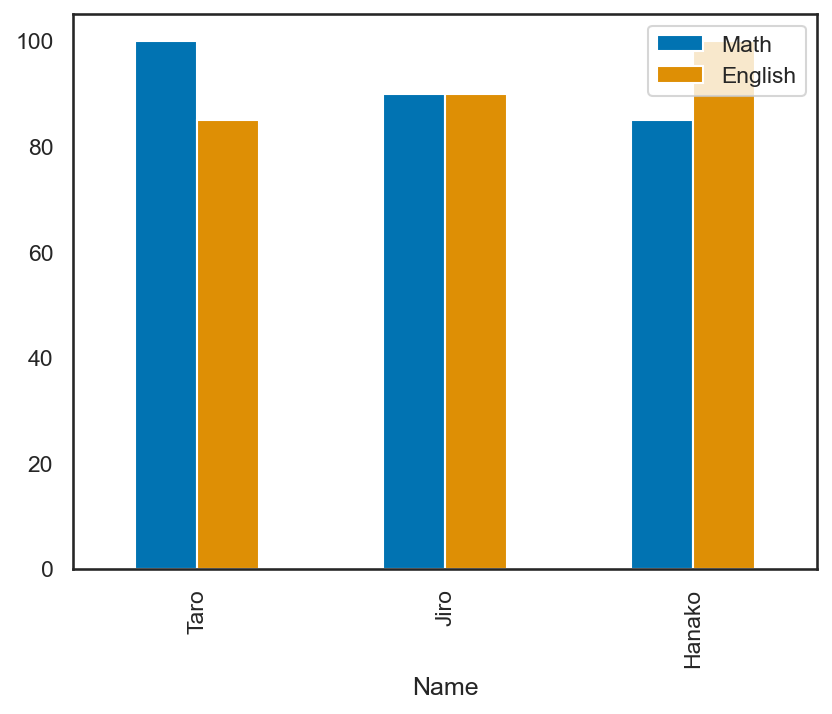

In [44]:
# 棒グラフの作成
df.plot.bar(x="Name", y=["Math", "English"])
plt.show()

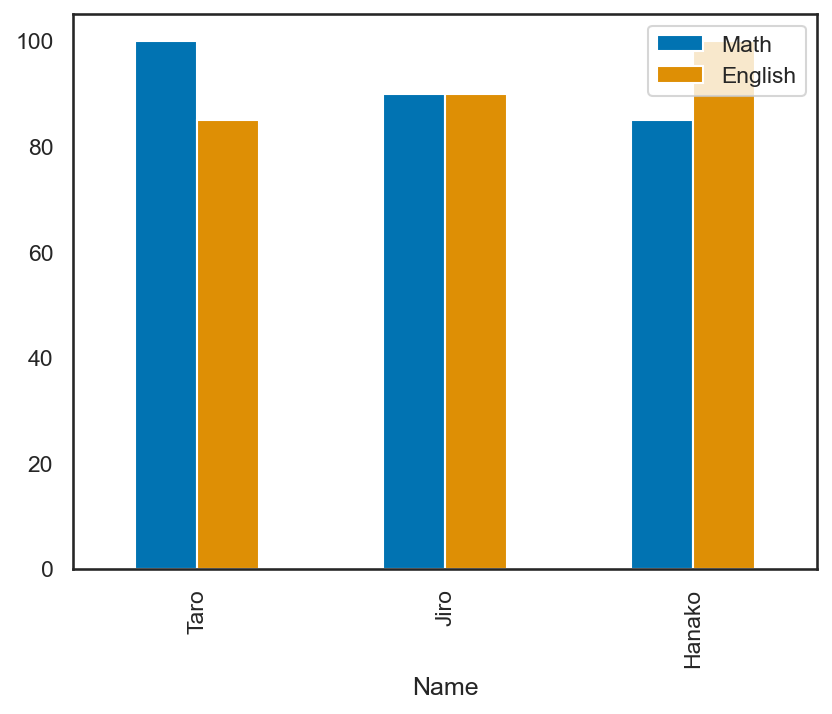

In [45]:
# plot(..., kind=...)を使う場合
df.plot(x="Name", y=["Math", "English"], kind="bar")
plt.show()

なお、グラフの見た目を調整したい場合には、`plt.title`等のメソッドを順次呼び出せば良い。


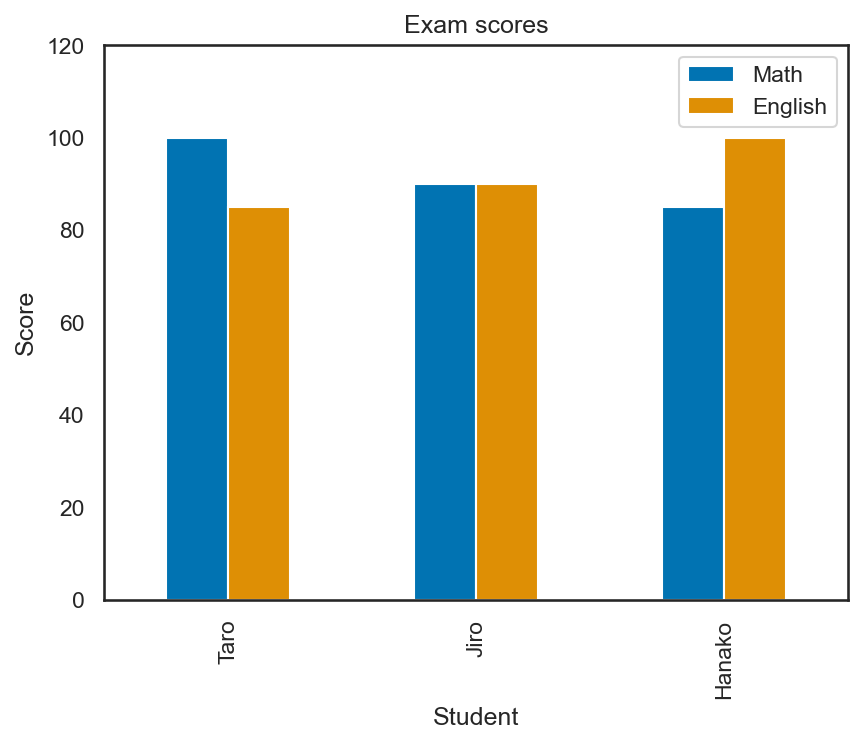

In [46]:
df.plot.bar(x="Name", y=["Math", "English"])
plt.title("Exam scores")
plt.xlabel("Student")
plt.ylabel("Score")
plt.ylim([0, 120])
plt.legend(loc="upper right")
plt.show()

また、複数のグラフを並べたい場合には`plot`の`ax`パラメータに対して Matplotlib の`SubplotAxis`を指定すれば良い。


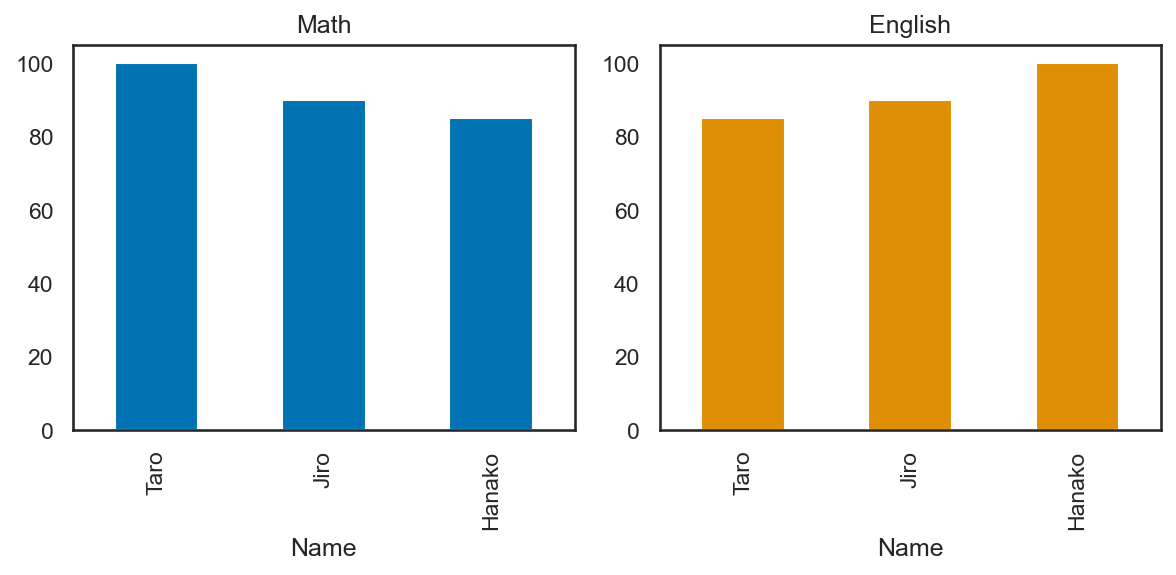

In [47]:
fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(121)
df.plot(ax=ax, x="Name", y="Math", kind="bar", legend=None, color=color_palette[0])
ax.set_title("Math")

ax = fig.add_subplot(122)
df.plot(ax=ax, x="Name", y="English", kind="bar", legend=None, color=color_palette[1])
ax.set_title("English")

plt.tight_layout()
plt.show()